In [43]:
import pandas as pd
food = pd.read_csv('foodTask3.csv') #Als gesagt wurde es ist die gleiche csv, hatte ich die neue schon drin :D
food.head

<bound method NDFrame.head of         Unnamed: 0  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0          Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1          Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2          Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3         Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4   Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   
5          Denmark     10.6       10.8   3.7  25.0   9.9     21.9     4.8   
6        E Germany      8.4       11.6   3.7  11.1   5.4     24.6     6.5   
7          Finland      9.5        4.9   2.7  33.7   5.8     26.3     5.1   
8           France     18.0        9.9   3.3  19.5   5.7     28.1     4.8   
9           Greece     10.2        3.0   2.8  17.6   5.9     41.7     2.2   
10         Hungary      5.3       12.4   2.9   9.7   0.3     40.1     4.0   
11         Ireland     13.9       10.0   4.7  

In [44]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
data = food.drop(columns=["Unnamed: 0"]) 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [46]:
# KMeans-Clustering mit Silhouette-Analyse 
best_k = 2
best_score = -1
scores = []

for k in range(2, 6):  # K variieren von 2 bis 5
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    scores.append((k, score))
    if score > best_score:
        best_score = score
        best_k = k
        best_kmeans = kmeans
        best_labels = labels

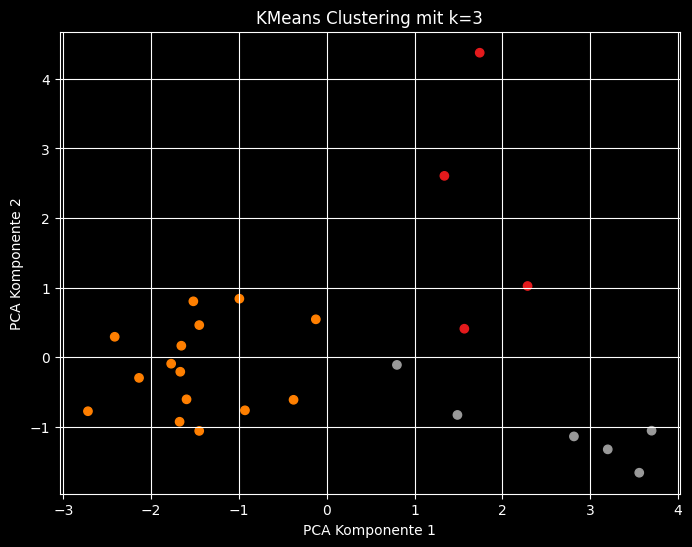

In [47]:
# Visualisierung der KMeans-Cluster mit PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_labels, cmap='Set1')
plt.title(f"KMeans Clustering mit k={best_k}")
plt.xlabel("PCA Komponente 1")
plt.ylabel("PCA Komponente 2")
plt.grid(True)
plt.show()


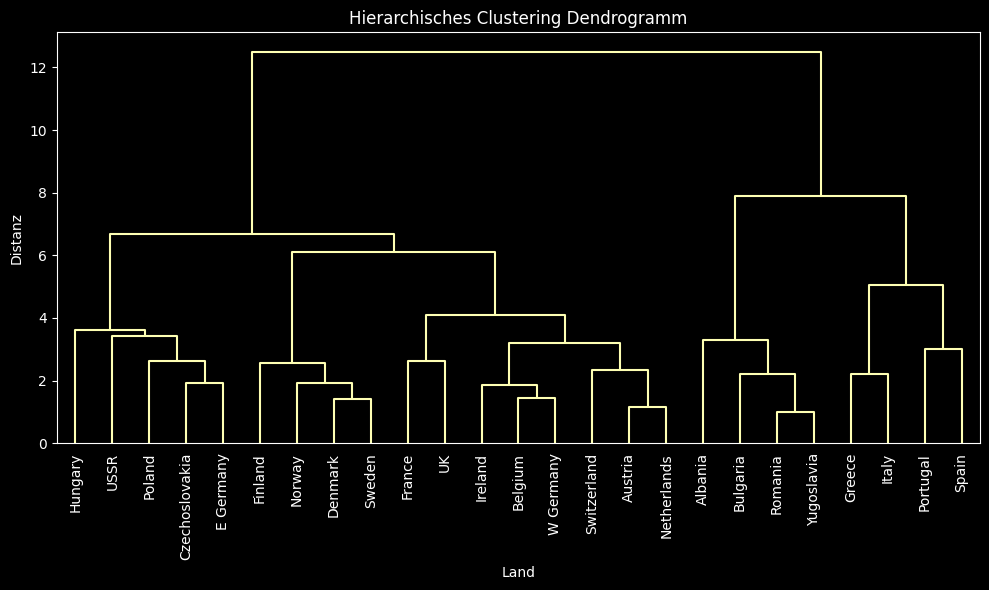

In [48]:
# Hierarchisches Clustering und Dendrogramm
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=food["Unnamed: 0"].values, leaf_rotation=90, color_threshold=20)
plt.title("Hierarchisches Clustering Dendrogramm")
plt.xlabel("Land")
plt.ylabel("Distanz")
plt.tight_layout()
plt.show()

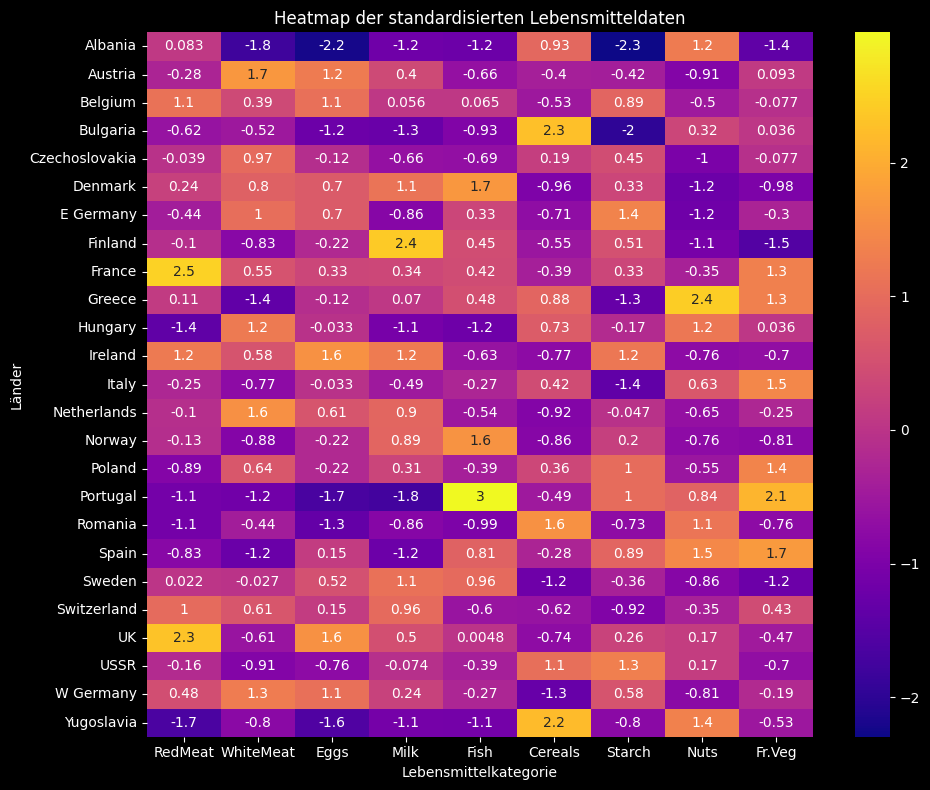

In [59]:
# Heatmap mit Clusteranalyse
import seaborn as sns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_food = pd.DataFrame(data_scaled, columns=data.columns, index=food["Unnamed: 0"])

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(data_scaled_food, cmap="plasma", annot=True)  # annot=True zeigt Zahlen in den Feldern
plt.title("Heatmap der standardisierten Lebensmitteldaten")
plt.xlabel("Lebensmittelkategorie")
plt.ylabel("Länder")
plt.tight_layout()
plt.show()

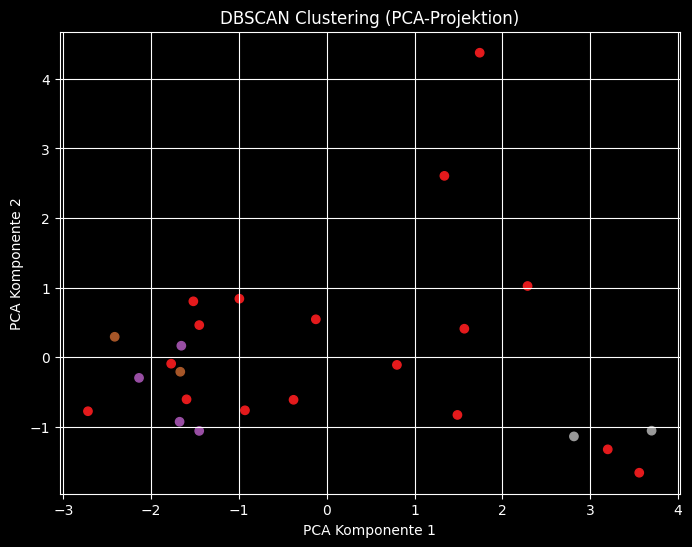

In [50]:
# DBSCAN-Clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='Set1')
plt.title("DBSCAN Clustering (PCA-Projektion)")
plt.xlabel("PCA Komponente 1")
plt.ylabel("PCA Komponente 2")
plt.grid(True)
plt.show()